In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Question 1

## Problem 1

In [2]:
from plots import normal_plot

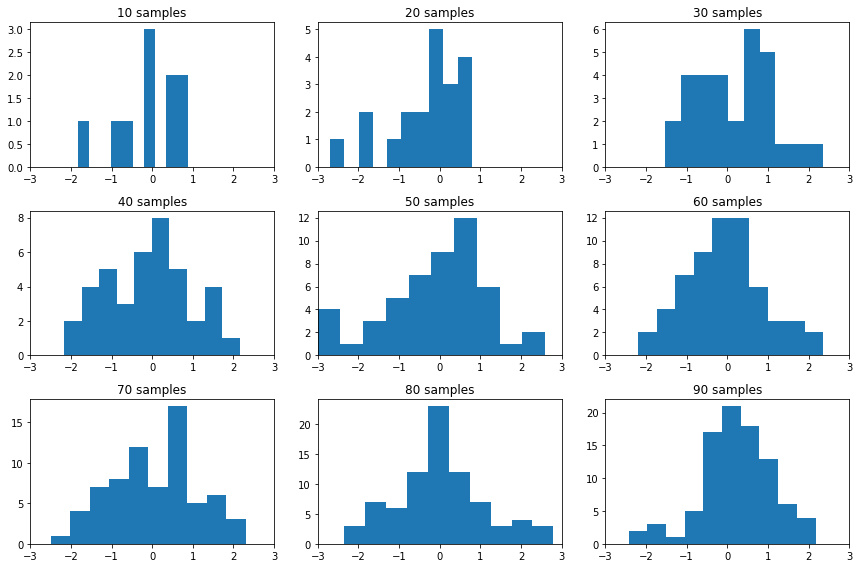

In [3]:
fig = plt.figure(figsize=(12,8))
for i in range(1,10):
    fig.add_subplot(3,3,i)
    normal_plot(i*10)
plt.tight_layout()

## Problem 2

In [4]:
from plots import plot_distributions

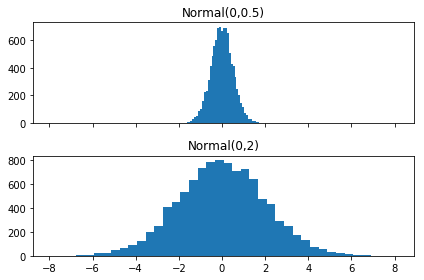

In [5]:
plot_distributions(np.random.normal(0, 0.5, 10000), 
                   np.random.normal(0, 2, 10000), 
                  "Normal(0,0.5)", "Normal(0,2)", 40)

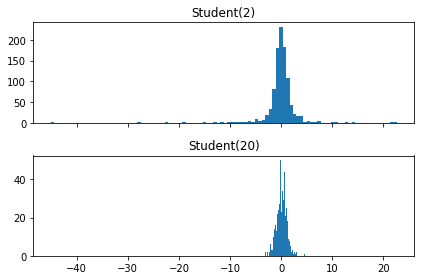

In [6]:
plot_distributions(np.random.standard_t(2, 1000), 
                   np.random.standard_t(20, 1000), 
                   "Student(2)", "Student(20)", 100)


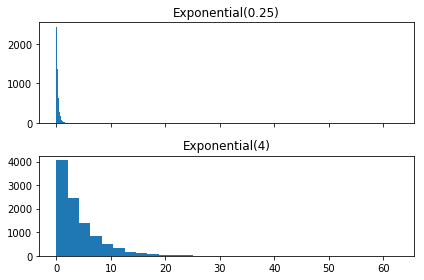

In [7]:
plot_distributions(np.random.exponential(0.25, 10000), 
                   np.random.exponential(4, 10000),
                  "Exponential(0.25)", "Exponential(4)", 30)

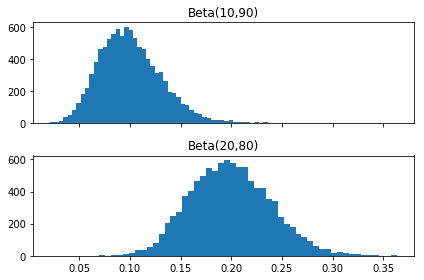

In [8]:
plot_distributions(np.random.beta(10,90, 10000), 
                   np.random.beta(20,80, 10000),
                  "Beta(10,90)", "Beta(20,80)", 50)

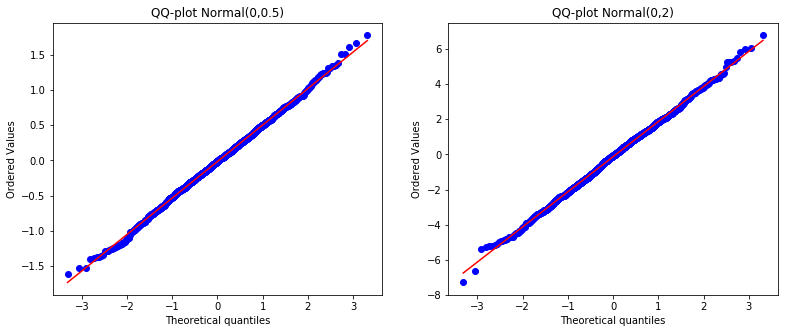

In [9]:
from plots import qq_plots
qq_plots(np.random.normal(0, 0.5, 1500), 
         np.random.normal(0, 2, 1500),
         "Normal(0,0.5)", "Normal(0,2)")

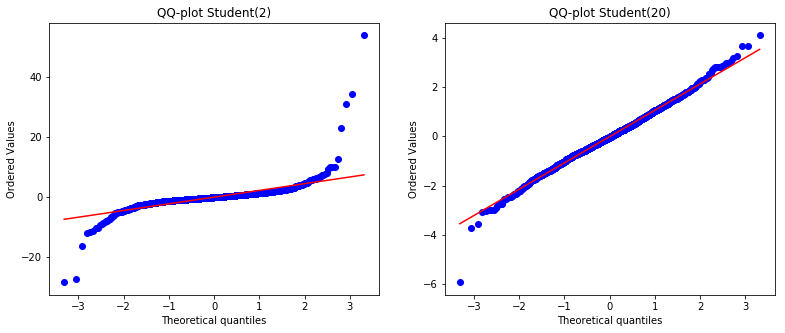

In [10]:
qq_plots(np.random.standard_t(2, 1500), 
         np.random.standard_t(20, 1500), 
         "Student(2)", "Student(20)")

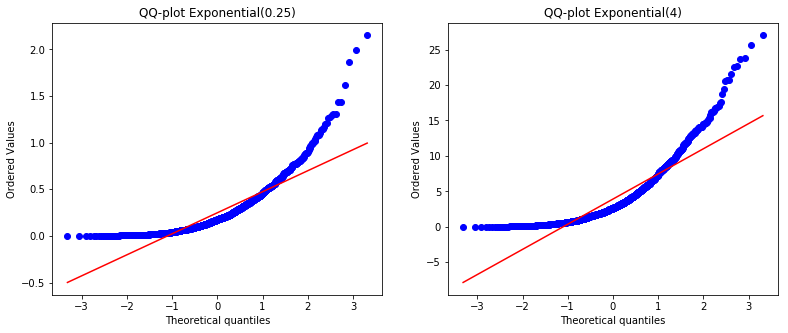

In [11]:
qq_plots(np.random.exponential(0.25, 1500), 
         np.random.exponential(4, 1500),
        "Exponential(0.25)", "Exponential(4)")

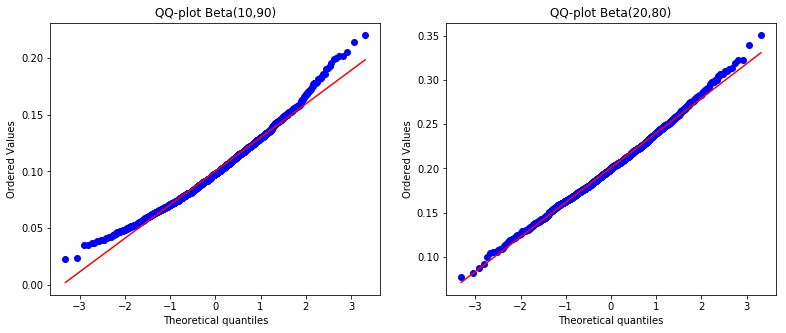

In [12]:
qq_plots(np.random.beta(10,90, 1500), 
         np.random.beta(20,80, 1500),
        "Beta(10,90)", "Beta(20,80)")

### Interpretation
A QQ-Plot shows the correlation between the theoretical quantiles and the actual values. Here, the theoretical quantiles are taken from a standard normal. This means that the more the samples (blue) follow the theoretical line (red), then the distribution is normal.
If they are different, here is how to interprete:

#### S-Shape
?

#### U-Shape
A U-shape shows the sampeled distribution is right-skewed (and so an `n-shape` shows a left-skewed distribution). This is coherent with the QQ plot of the exponential distribution: exponential is heavily right-skewed (by definition) and thus the plot 

# Question 2

## Problem 3

In [13]:
from helpers import compute_waypoints
# Configuration
S = 236097
params = {
    "N" : 100, # people
    "side_l" : 1000, # meters
    "time_limit" : 86400, # seconds, = 1day
    "v_min" :  (0.5 + 0.02*(S%21)),
    "v_max" : (3 + 0.2*(S%11))
}

In [14]:
records = compute_waypoints(params)

In [15]:
%timeit compute_waypoints

18.6 ns ± 0.284 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)


Running the program for 1 days takes only a few nanoseconds

In [16]:
num_waypoints_per_mobile = [len(x) for x in records]
print("Mean:",np.mean(num_waypoints_per_mobile))
print("Min:",np.min(num_waypoints_per_mobile))
print("Max:",np.max(num_waypoints_per_mobile))

Mean: 321.41
Min: 294
Max: 359


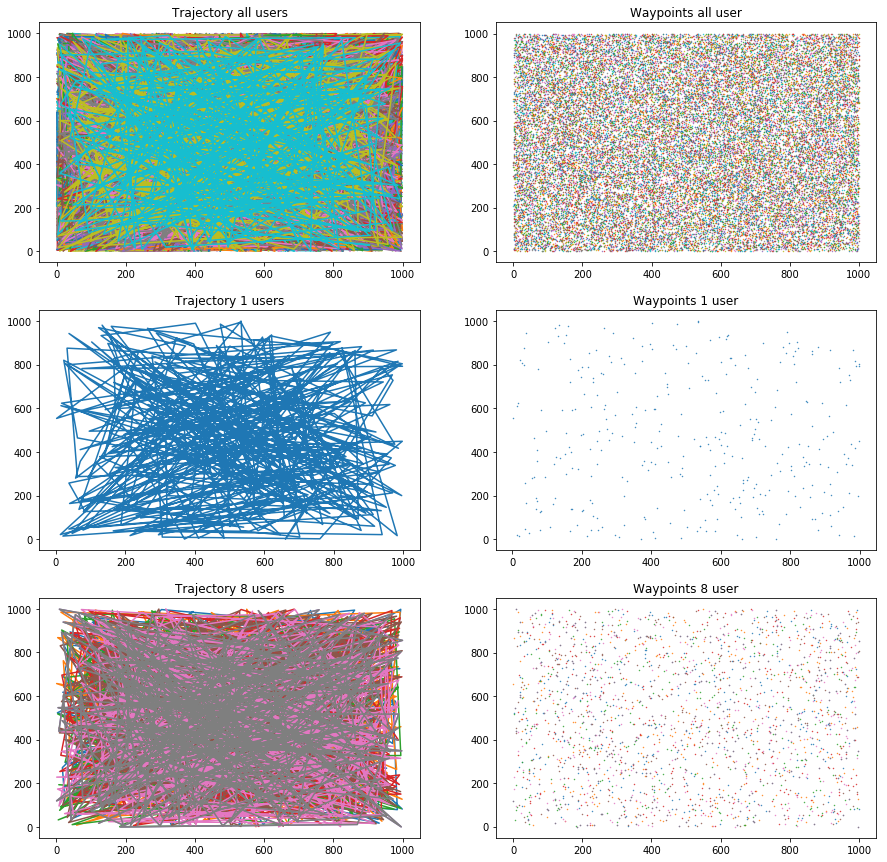

In [17]:
f, (ax1, ax2, ax3) = plt.subplots(3,2,figsize=(15,15))

## plot all
for rec in records:
    posi_x = ([x for (x,_),_,_ in rec])
    posi_y = ([y for (_,y),_,_ in rec])
    ax1[0].plot(posi_x,posi_y)
    ax1[1].scatter(posi_x, posi_y, s=0.2)
ax1[0].set_title("Trajectory all users")
ax1[1].set_title("Waypoints all user")

# plot 1
rec = np.random.choice(records)
posi_x = ([x for (x,_),_,_ in rec])
posi_y = ([y for (_,y),_,_ in rec])
ax2[0].plot(posi_x,posi_y)
ax2[1].scatter(posi_x, posi_y, s=0.2)
ax2[0].set_title("Trajectory 1 users")
ax2[1].set_title("Waypoints 1 user")

# plot 8
for rec in np.random.choice(records, 8):
    posi_x = ([x for (x,_),_,_ in rec])
    posi_y = ([y for (_,y),_,_ in rec])
    ax3[0].plot(posi_x,posi_y)
    ax3[1].scatter(posi_x, posi_y, s=0.2)
ax3[0].set_title("Trajectory 8 users")
ax3[1].set_title("Waypoints 8 user")



plt.show()

# Question 3

## Event average viewpoint

Text(0.5, 1.0, 'Event average for one user')

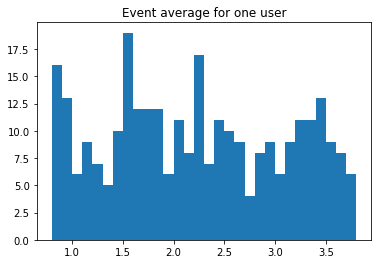

In [18]:
rec = np.random.choice(records)
speeds = [x[2] for x in rec]
plt.hist(speeds, bins=30)
plt.title("Event average for one user")

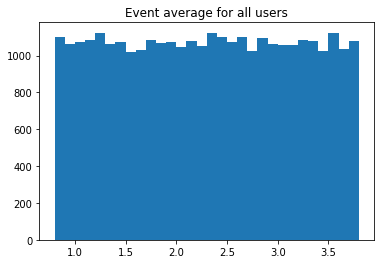

In [19]:
speeds = [x[2] for rec in records for x in rec]
plt.hist(speeds, bins=30);
plt.title("Event average for all users");

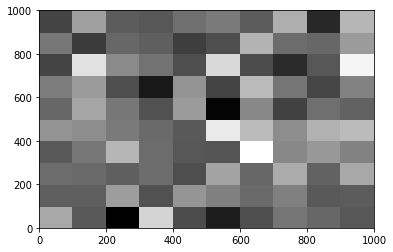

In [20]:
x = [x[0][0] for rec in records for x in rec]
y = [x[0][1] for rec in records for x in rec]
plt.hist2d(x,y, cmap="gray");

## Time average viewpoint

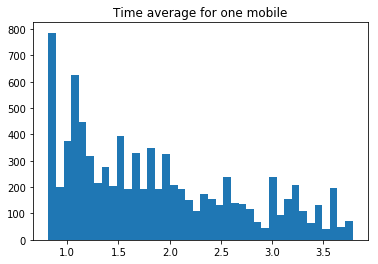

In [21]:
from helpers import speed_at_time_t, position_at_time_t

random_dude = np.random.choice(records)
ten_seconds = range(0, params['time_limit'], 10) # every 10 seconds
speeds_every_10_sec = [speed_at_time_t(t, random_dude) for t in ten_seconds]

plt.hist(speeds_every_10_sec, bins=40);
plt.title("Time average for one mobile")
plt.show()

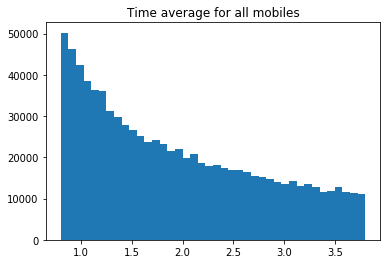

In [22]:
speeds_every_10_sec = []
ten_seconds = range(0, params['time_limit'], 10) # every 10 seconds
for person in records:
    speeds = [speed_at_time_t(t, person) for t in ten_seconds]
    speeds_every_10_sec.extend(speeds)
plt.hist(speeds_every_10_sec, bins=40);
plt.title("Time average for all mobiles")
plt.show()

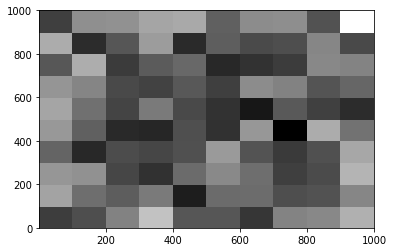

In [23]:
ten_seconds = range(0, params['time_limit'], 10) # every 10 seconds
positions_evers_10_secs = []
for person in records[:5]:
    positions = [position_at_time_t(t, person) for t in ten_seconds]
    positions_evers_10_secs.extend(positions)

x,y = list(zip(*positions_evers_10_secs))
plt.hist2d(x,y, cmap="gray");

# Question 4
## Problem 1
### a)

In [24]:
from plots import plot_boxplots_ci
from helpers import get_average

In [25]:
curr_N = 100
X,Y = get_average(records, curr_N, params)

#### Finding CI for median
This is found using theorem 2.1. We have 100 values. This value is too large to look up in the table. So we estimate it using the formula 
$$\Big[\big\lfloor 0.50n - 0.980\sqrt{n}\rfloor\ ,\ \lceil 0.50n + 1 + 0.980\sqrt{n}\big\rceil\Big]$$
with $n=100$, which yields us the results $j = \lfloor 50 - 9.8 \rfloor = 40$ and $k = \lceil 50 + 9.8 \rceil = 61$
So we select the 40th and 61st values as our CI for median

#### Finding CI for mean
We use theorem 2.2.2, with 100 values:
$$\hat\mu \pm 0.196 s  \text{ with } s = \frac{1}{100}\sum(x_i-\hat\mu)^2\text{ and }\hat\mu = \frac{1}{100} \sum x_i$$
We could have used theorem 2.2.3, as the values seem to be normally distributed, but as we have a lot of values, the two theorems are similar enough to use 2.2.2 without risks. However, with $n \geq 30$, the two are roughly equal.

In [26]:
plot_boxplots_ci(X, Y, j=40, k=61, n=curr_N)

ValueError: Given lines do not intersect. Please verify that the angles are not equal or differ by 180 degrees.

<Figure size 1440x1800 with 2 Axes>

### b)
Interestingly, the mean/median of the Time Average is significantly lower than for the Event Average. Also, the confidence intervals are much smaller. Because with the event average, we use "every" speed data points once, the CI is much narrower. With time average, we probably don't pick some speeds and some might be picked twice, leading to a more uncertain CI. 

### c)

In [27]:
curr_N = 30
X,Y = get_average(records, curr_N, params)

#### Finding CI for median
This is found using theorem 2.1. We have 30 values. So we can look up in the table. We must pick the values 10 and 21 of the sorted sequence.

#### Finding CI for mean
We use theorem 2.2.2, with 30 values:
$$\hat\mu \pm 0.196 s  \text{ with } s = \frac{1}{30}\sum(x_i-\hat\mu)^2\text{ and }\hat\mu = \frac{1}{30} \sum x_i$$
We could have used theorem 2.2.3, as the values seem to be normally distributed, but as we have a lot of values, the two theorems are similar enough to use 2.2.2 without risks. In practice however, as $n \geq 30$, the two are roughly equal.

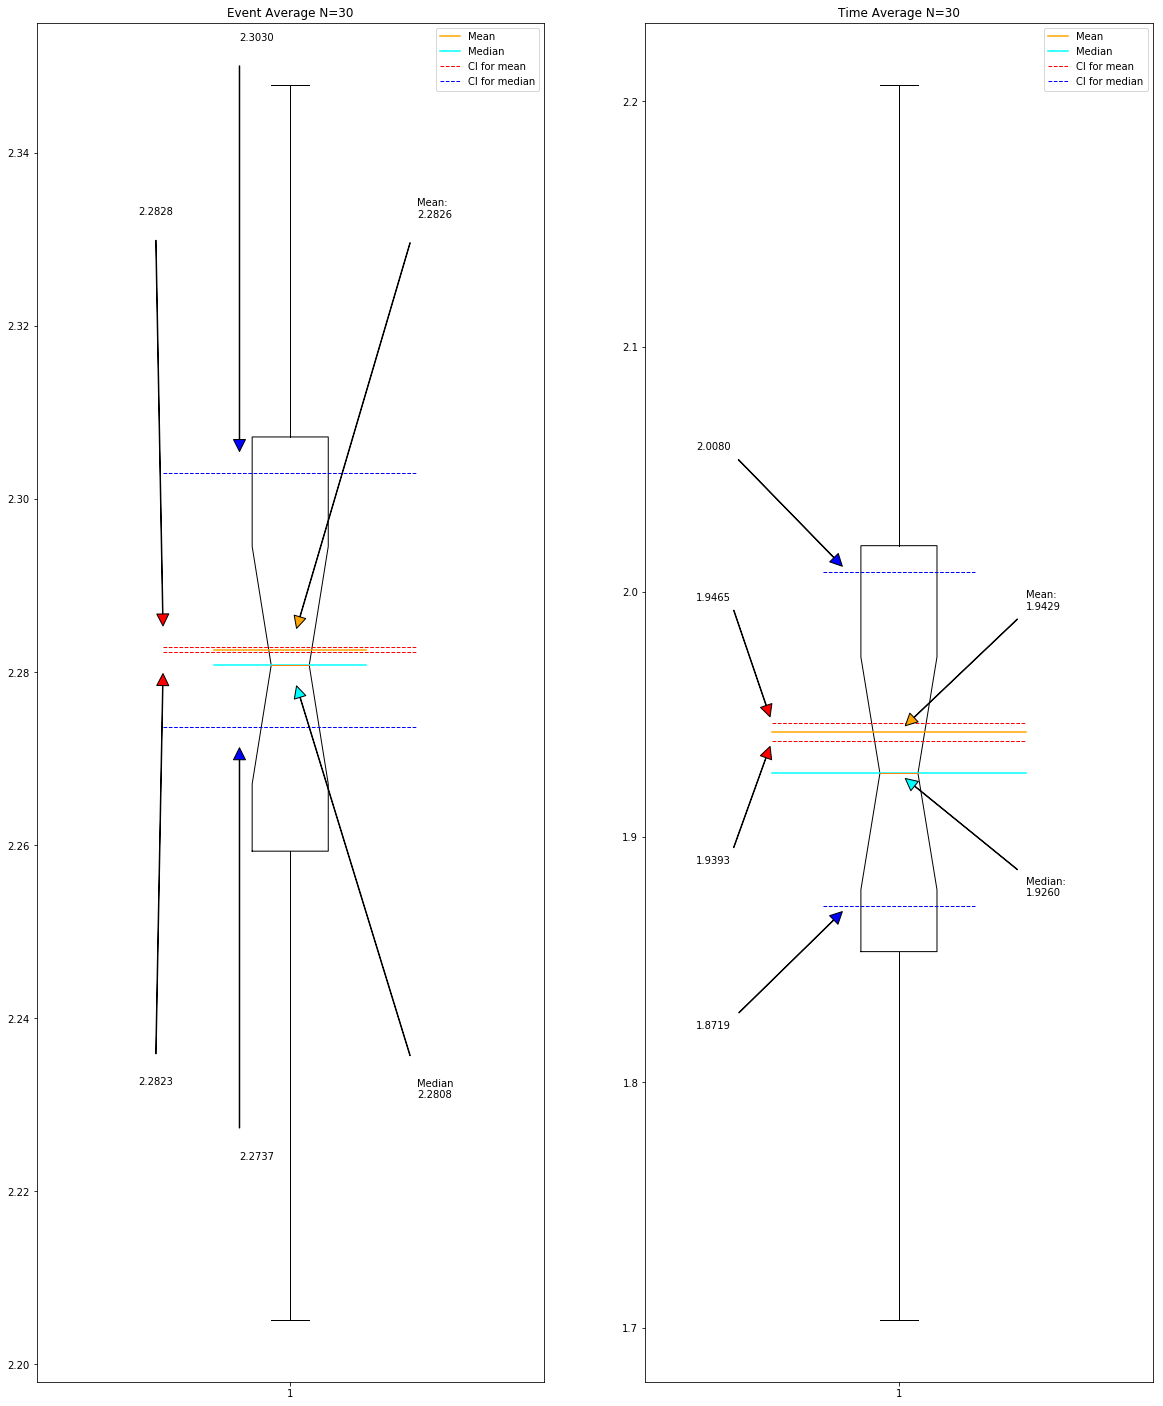

In [28]:
plot_boxplots_ci(X, Y, j=10, k=21, n=curr_N)

### d)
We observe that the confidence intervals for the median and the mean are significantly larger with $N = 30$. As we grow to more samples, we can more effectively estimate the ''true'' distribution ; indeed, with more samples we are more confident to find the true median/mean, insteand of an effect of ''bad luck'' caused by some unlucky sampling. 

## Problem 2

### a) + b)

In [29]:
from plots import plot_boxplots_pi

1 98


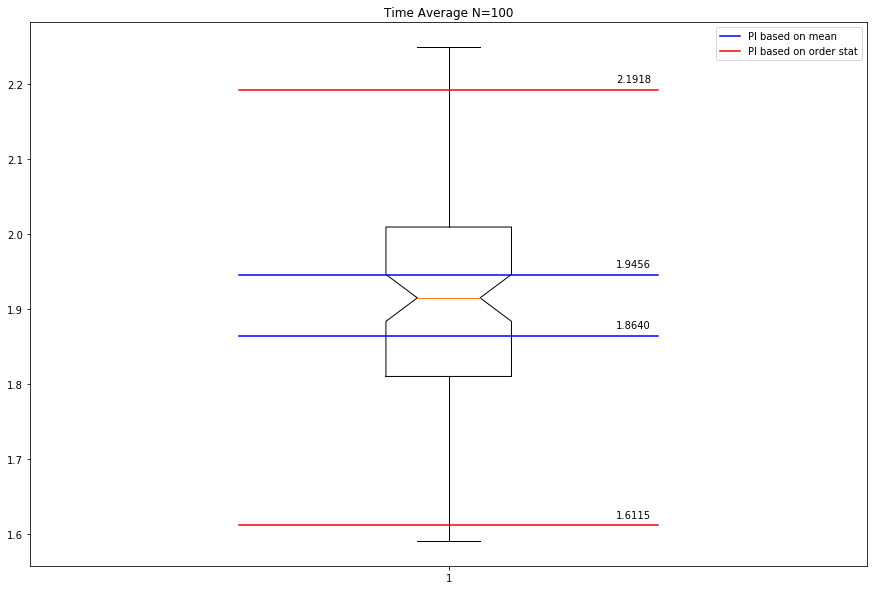

In [30]:
curr_N = 100
_,Y = get_average(records, curr_N, params)
plot_boxplots_pi(Y)

0 59


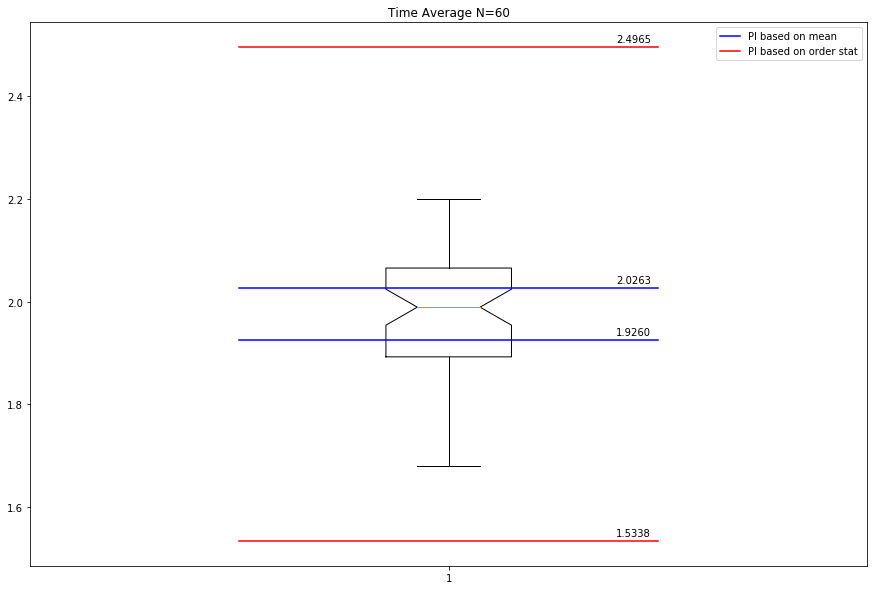

In [31]:
curr_N = 60
_,Y = get_average(records, curr_N, params)
plot_boxplots_pi(Y)

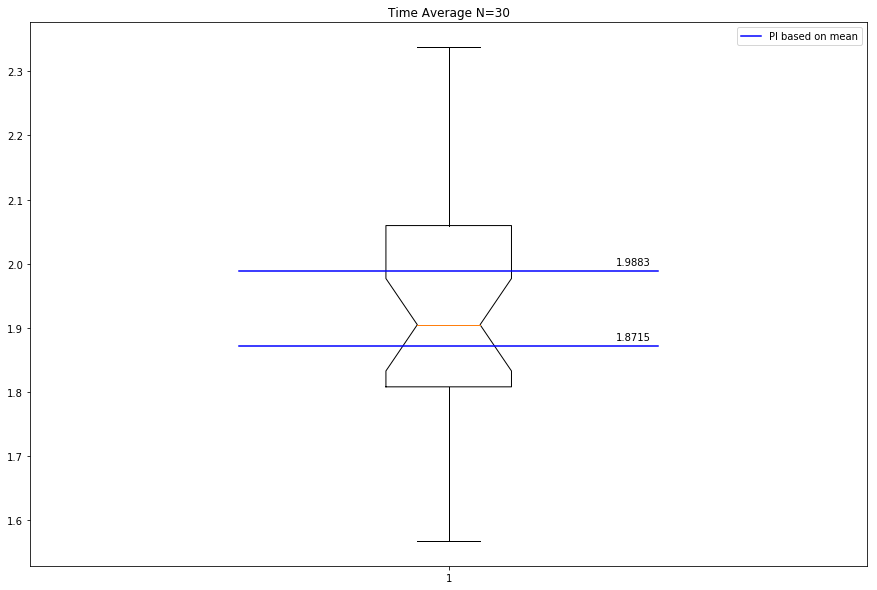

In [32]:
curr_N = 30
_,Y = get_average(records, curr_N, params)
plot_boxplots_pi(Y)

Note that we can't plot the PI based on order statistic here, as at $n = 30 < 39$, we can't reach level 0.95.

### c)
The Prediction Interval obtained with order statistics is extremely less precise than the one obtaines using estimates of mean and variance. Order statistics works better with a lot more data, than just 100 or 60. We see that the PI at 60 is the first and last sample, which yields absolutely no information: future points are confidently between the smallest and largest observed so far.

### d)
PI based on order statistics is virtually useless for the two first graphs, but consistently to the extremes. Interestingly, PI based on estimates of mean/variance is not affected linearly: it shifts slightly up between N=100 and N=60 (without obvious loss of precision), and shifts down again for N=30. The interval seems to be robust to a lower amount of data, and is still usable.